## Göğüs Kanseri Sınıflandırması

Proje süresince izlenecek adımlar şu şekildedir:

    1-Veri seti ve problem tanımı yapılır.
    
    2-Veri seti ve gerekli kütüphaneler yüklenir.
    
    3-Veri incelenecenktir. Bunun için en temel yöntemlerden birisi exploratory data science (keşifsel-açıklayıcı veri analizi) gerçekleştirilecektir. Bu adımın ardından veri ile ilgili orta detaylı bilgiye sahip olunmuştur.
    
Bu adıma kadar verinin içeriği hakkında, verinin tipleri hakkında, verinin içerisinde bulunan missing value'ler hakkında,       outlier olup olmaması durumu hakkında, hangi feature'ler arasında korelasyon olduğu hakkında, hangi feature'lerin         sınıflandırma sonucunu etkileceği hakkında, veride bulunan sample sayısı hakkında, feature'lerin ve sınıflandırmada kullanılacak label'ların dağılımı hakkında bilgi sahibi olunmuştur.
    
Veri setinde çok az miktarda missing value vardır ve bunlar önemli olmadığından missing value'leri çıkarmaya gerek yoktur.

    4-Outlier detection işlemi yapılacaktır. 
    
    5- Outlier tespitinin ardından eğitim aşamasına geçebiliriz. Eğitimden önce veri seti train ve test setlerine ayrılır. Bu işlemin ardından standardization işlemi gerçekleştirilir. Bu işlemlerin ardından modeli eğitebiliriz. KNN algoritması kullanılacaktır. KNN için en iyi parametreler seçilecektir.
    
    6-PCA işlemi gerçekleştirilecektir.
    
    7-NCA işlemi gerçekleştirilecektir.
    
    8-Son olarak elde edilen sonuçlar değerlendirilecektir.
    
<br>
<img src="g1.png" align = "left" style="width:700px;height:300px"/>

KNN algoritması sonucunda birinci accuracy değeri elde edilir. KNN için en iyi parametreleri bulduktan sonra 2.accuracy elde edilir. PCA işleminden sonra 3.accuracy elde edilir. NCA işleminden sonra 4.accuracy elde edilir. 1.accuracy'den 1.accuracy'e geçerken bir artış söz konusu olucaktır. 2.accuracy'den 3.accuracy'e geçerken bir azalış söz konusu olacaktır. PCA ve NCA işlemleri paraler gerçekleştirilir. Dolayısıyla 2.accuracy'den 4.accuracy'e geçerken bir artış söz konusu olucaktır. En iyi sonuç NCA işleminden sonra 4.accuracy'de elde edilmektedir.

Amaç kanser hücresinin iyi huylu mu kötü huylu mu olduğunun tespitini sağlamaktır.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

csv dosyasında en sağa gelindiğinde en sonda bir virgül bulunmakta dolayısıyla orada boş bir değer vardır. Bunun ismine 'Unnamed: 32' atamıştır. Bunu düzeltmenin bir yolu 'Unnamed: 32' sütununu drop etmektir.

In [3]:
data = data.rename(columns = {"diagnosis":"target"})

diagnosis feature'nin ismini target yaptım. Sebebi class label'larını barındıran feature isminin target olmasını istemektir.

B    357
M    212
Name: target, dtype: int64


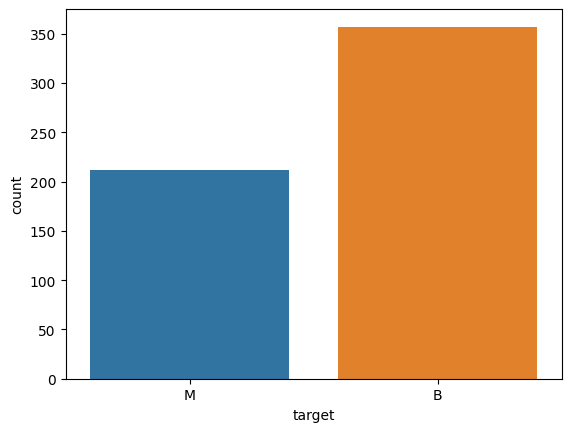

In [4]:
sns.countplot(data["target"])
print(data.target.value_counts())

target isimli feature içerisinde her bir class değerinden kaç adet bulunduğu bilgisi sayısal olarak yazdırılmıştır ve plot'u çizdirilmiştir. B class'ı iyi huylu tümörü ifade etmektedir. M class'ı kötü huylu tümörü ifade etmektedir.

In [5]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]

Bazı metotlarda ve train işleminde sayısal veriler kullanıldığı için yukarıdaki kod bloğu ile target feature'si içerisinde M değerleri 1, B değerleri 0 yapılmıştır.

strip() metodunu kullanma sebebim, M ve B değerlerinin başında boşluk karakteri olması ihtimaline karşı strip() ile boşlukların yok edilmesi sağlanmıştır. Mesela ifade " value=" M" " şeklinde ise "value.strip()" ile ifadenin "M" olması sağlanmaktadır. 

In [6]:
print(len(data))

569


Data içerisindeki sample sayısının 569 olduğu bilgisi elde edilmiştir.

In [7]:
print(data.head())

   target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           18

In [8]:
print("Data shape ", data.shape)

Data shape  (569, 31)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Şunu belirtmek istiyorum ki, missing value tespitinin en hızlı yolu info() metodudur. Bu veri setinde missing value yoktur.

In [10]:
describe = data.describe()
describe

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Çıktıda görüleceği üzere sayılar arasında çok fazla fark vardır. Büyük sayılar, küçük sayılara baskın gelebilir. Bu duurmu önlemek amacıyla standardization işlemi gerçekleştirilir.

Missing value'nin 2 tane türü vardır. Birincisi feature'ye ait herhangi bir satırda veri olmaması, boş olmasıdır. İkincisi ise, bazı veri setlerinde feature'ye ait herhangi bir satırın 0 olması missing value anlamına gelmektedir.

Fakat bu veri setinde 0 değerlerini missing value olarak değerlendirmeyeceğiz çünkü veri setini hazırlayan insanlar tarafından bu veri setindeki 0 değerlerinin missing value anlamına gelmediği belirtilmiştir.

Dolayısıyla veri setinde missing value bulunmamaktadır.

## Keşifsel-Açıklayı Veri Analizi (Exploratory Data Science) (EDA)

Veri seti numeric değerlerden oluştuğu için rahatlıkla correlation incelemesi yapabiliriz. Eğer veri setinde categorical yani string değerler olsaydı correlation matrisinde string değer içeren feature'ler dahil edilmez.

In [11]:
corr_matrix = data.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Çıktıda görülen değerlerin daha kolay anlaşılabilmesini sağlamak için seaborn kütüphanesinden yararlanarak görselleştirme yapalım.

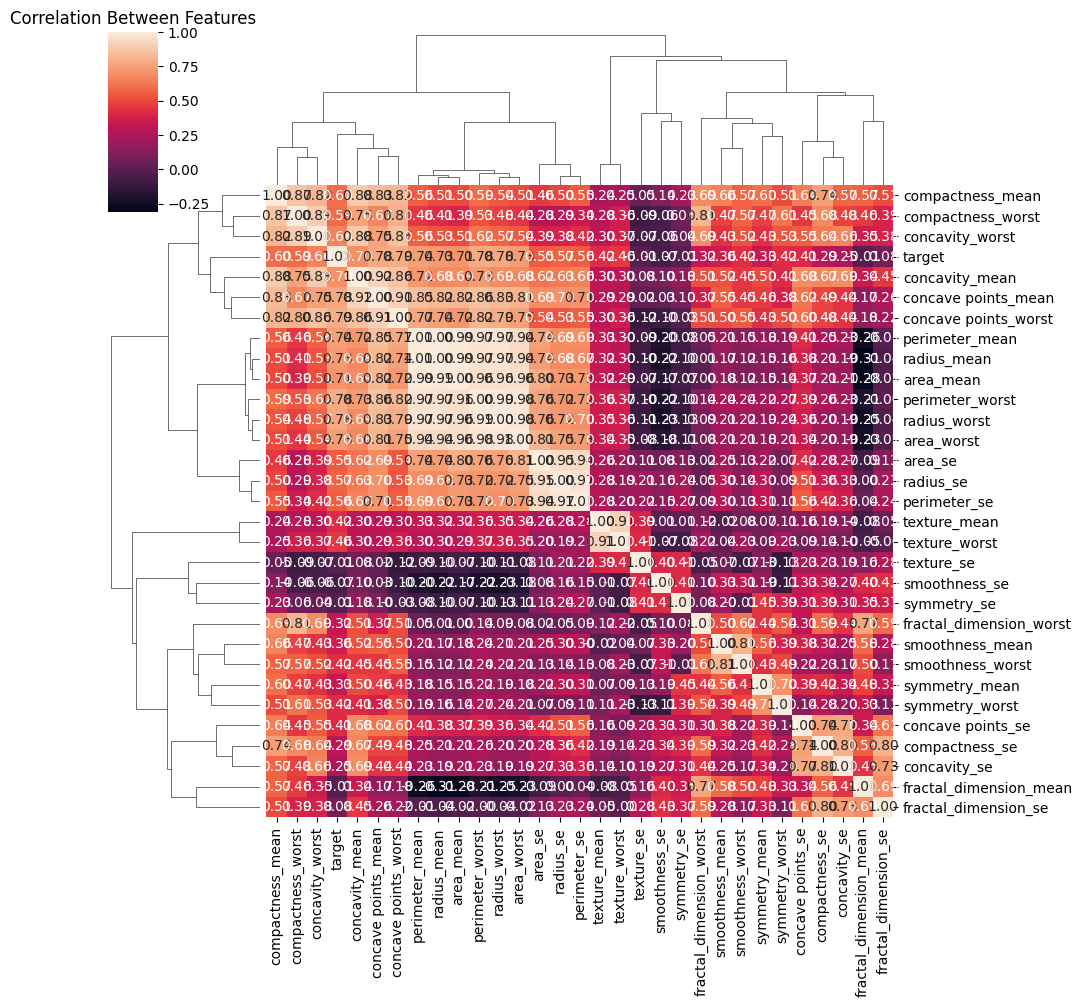

In [12]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

Correlation: İki feature arasındaki ilişkidir. Eğer iki feature arasındaki ilişki 1 ise bu iki feature %100 doğru orantılıdır. Eğer iki feature arasındaki ilişki -1 ise bu iki feature %100 ters orantılıdır anlamına gelmektedir. Eğer 0 ise herhangi bir ilişki yok demektir.

Bu tabloya göre bazı sonuçlar elde edebiliriz. İki feature birbirleri ile ilişkili ise bu iki feature'nin modele olan katkıları aynıdır. Mesela 0.99 oranında bir ilişkiye sahip iki feature'yi machine learning modelini eğitmek için kullanırsak, katkıları aynı olacaktır. Bu nedenle machine learning modeli eğitiminde kullanacağımız feature'lerde çeşitliliğe gitmemiz gerekir. Birbirleri arasında ilişki olmayan feature'ler kullanılabilir. Mesela aralarında 0.11 oranında ilişki bulunan iki feature kullanılabilir. Bu iki feature arasında çok fazla korelasyon yoktur ve eğer bu iki feature'yi machine learning modeli eğitiminde kullanırsak daha iyi bir model elde edebiliriz.

Machine learning modeli eğitiminde tüm feature'leri kullanmaya gerek yoktur. Aralarında korelasyon olan feature'lerden bir tanesini kullanmak yeterli olacaktır. Feature engineering ile kullanmayacağımız feature'leri çıkarabiliriz.

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

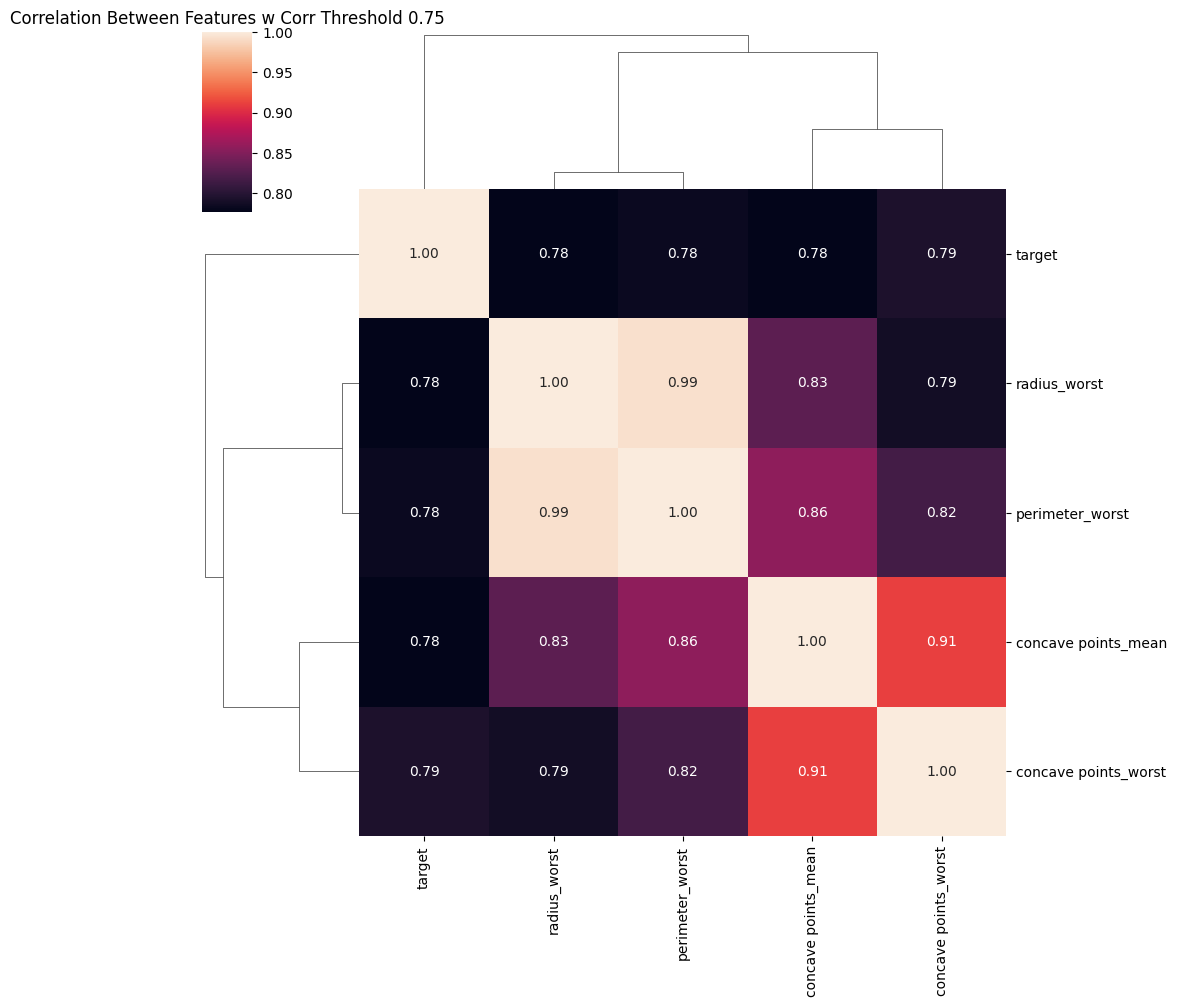

In [13]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75")

Yukarıdaki kod bloğu ile sadece 0.75 değerinden yüksek ilişkiler görüntülenmiştir.

0.75 değeri negatifte olabileceğinden np.abs() metodu ile mutlak değeri alınarak sadece 0.75'in değerlendirilmesi sağlanmıştır.

tolist() metodu ile listeye çevrim sağlanmıştır.

target feature'sinin yüksek ilişkiye shaip olduğu feature'ler görülmektedir.

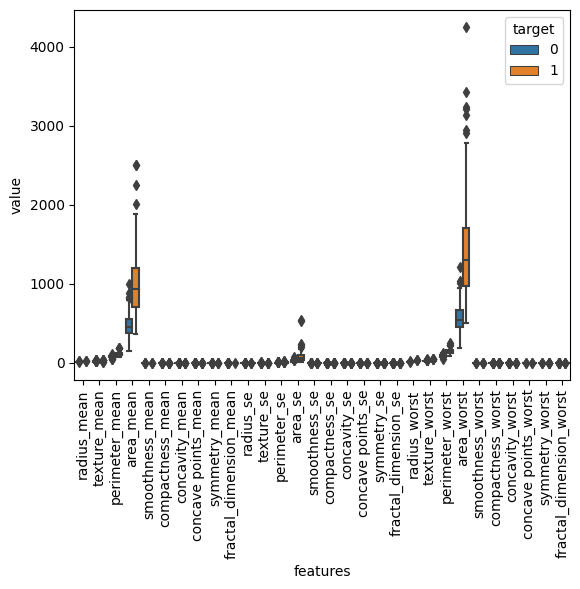

In [14]:
# box plot 
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

Görüldüğü üzere sayılar arasındaki büyük farktan dolayı dağınık bir görünüm elde edilmiştir. Box plot'tan anlamlı sonuçlar çıkarabilmemiz için veriyi standardization etmemiz lazım yani normalizasyon yapmalıyız.

İlerleyen kısımlarda normalizasyon yapılacaktır ve bu işlemin ardından box plot incelenecektir.

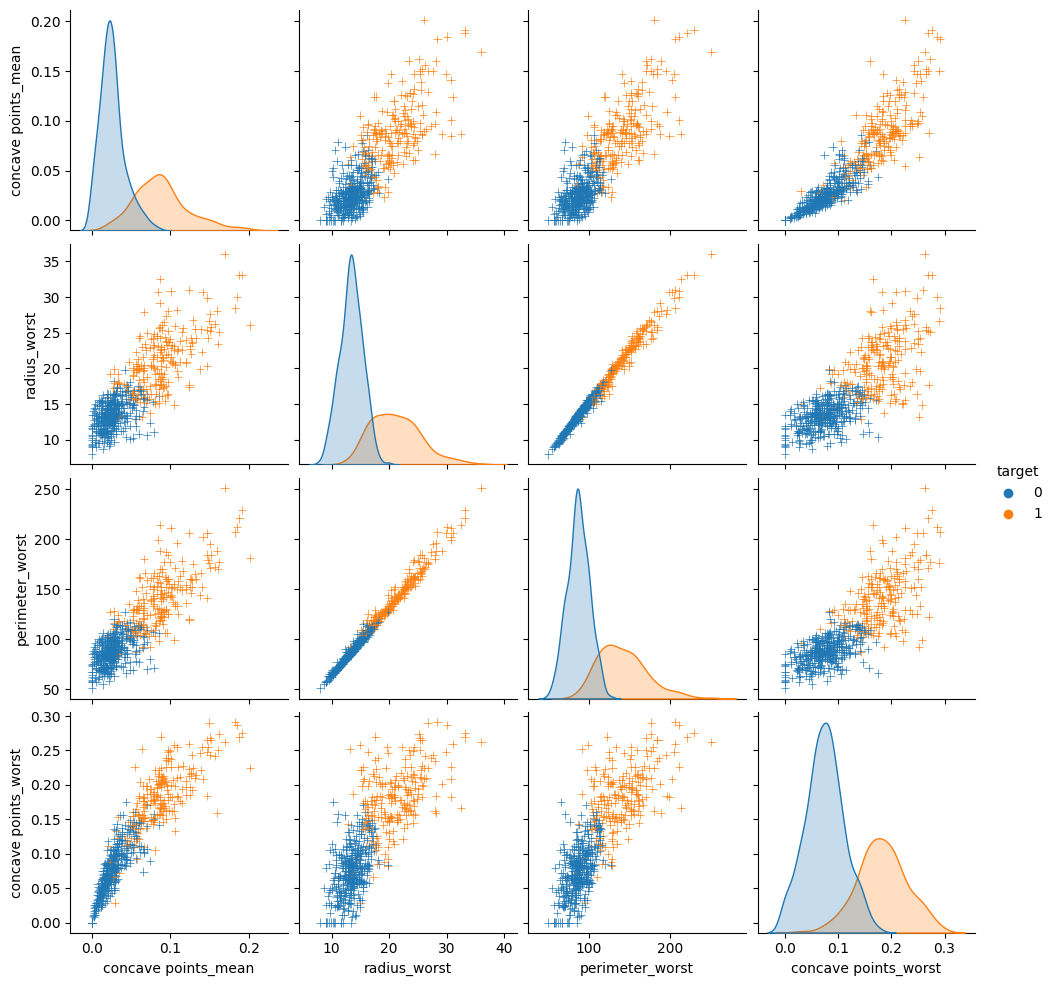

In [15]:
# pair plot 
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

Veri setindeki değerlerin düzensiz dağılıma sahip olmasından dolayı sadece corr_features değişkeninde tutulan ilişkili feature'lere pair plot uygulanmıştır. corr_features 0.75'ten yüksek korelasyon değerine sahip feature'lerdir.

diag_kind = "kde" ifadesini histogram olarak düşünebilirsiniz.

Maviler 0 değerine sahip olan iyi huylu kanser hücreleridir.

Skewness kavramından bahsetmek istiyorum.

Skewness : Gauss dağılıma sahip olmayan dağılım olarak düşünülebilir. Dağılımın kuyruğu sağa doğru uzandıysa bunu pozitif skewness  olarak adlandırabiliriz. Dağılımın kuyruğu sola doğru uzandıysa bunu negatif skewness  olarak adlandırabiliriz.

Skewness'lık var ise yapılması gereken 2 şey vardır. Birincisi outlier detection yaparken bu Skewness'lığı handle edebilecek outlier detection yöntemini kullanmaktır. İkincisi ise Skewness'lığı düzelterek normal dağılıma çevirmektir.

Biz outlier tespiti yaparken Skewness'lığı ele alacak bir yöntem kullanacağız.

Mesela pozitif Skewness'lık gerçek hayatta gelir dağılımı olabilir. Çünkü mesela çok uç noktada geliri olan insanlar vardır ve bu değerler dağılımın kuyruğunu uzatırlar. 

Dağılımda en yüksek tepede mod değeri bulunur.

Negatif Skewness ise öğrencilerin not dağılımı olabilir. Mesela çok zor bir sınav olsaydı pozitif Skewness olurdu. Ama çok kolay bir sınavda genelde öğrenciler yüksek alacağından negatif Skewness söz konusu olacaktır.

Skewness testleri vardır. Eğer skew() değeri 1'den büyük ise pozitif Skewness vardır. Eğer skew() değeri -1'den küçük ise negatif Skewness vardır. Data'da  Eğer skew() değeri 1'den büyük ise pozitif Skewness vardır. 'lık var ise düzeltilmesi gerekmektedir.

<br>
<img src="g2.png" align = "left" style="width:700px;height:300px"/>

Bu data'da bir Skewness'lık söz konusudur.

## Outlier Detection: Local Outlier Factor Yöntemi

Outlier, veri seti içerisinde bulunan aykırı değerlerdir. Outlier ölçümlerde bulunan hata kaynaklı olabilir. Eğer ayıklanmazsa modeli yanlış yönlendirebilir.

<br>
<img src="g3.png" align = "left" style="width:400px;height:200px"/><br>

Yanda local ve global outlier'ları görmektesiniz.

Density based outlier detection sistemini kullanacağız. Bu sistem içerisinden local outlier factor (lof) yöntemini kullanacağız.

Local outlier factor (lof) yöntemini kullanma sebebimiz, skew data içerisinde bulunan outlier'ları tespit edebilmemiz için etkili bir yöntemdir. 

Local outlier factor (lof): Bir tane noktanın local density'i ile KNN'in local density'i karşılaştırılacaktır.

KNN algoritmasının k değerini 20 seçeceğiz. Çünkü bu yöntemde genelde k=20 için güzel sonuçlar alınıyor.

<br>
<img src="g4.png" align = "left" style="width:300px;height:300px"/><br>

<br>
<img src="g5.png" align = "left" style="width:400px;height:200px"/><br>

A noktasının LOF değeri 1'den büyük ise outlier'dır, 1'den küçük ise outlier değildir, inlier'dır.

A noktasının LOF değeri şöyle hesaplanmaktadır:

LOF A = ( (LRD B +LRD D ) / LRD A ) * 1/k

LRD: Local Reachability Density

A noktasına öklid hesabı ile en yakın iki nokta B ve D dir ve dolayısıyla (LRD B +LRD D ) kısmına LRD'nin yanına B ve D yazılır.

LRD = 1/ARD 'dir.

ARD: Average Reachability Distance

ARD, Reachability Distance'nin ortalamasının alınmasıdır. RD(Reachability Distance)/k sonucu ARD değeridir.

Mesela k=2 için: 

<br>
<img src="g6.png" align = "left" style="width:600px;height:200px"/><br>

Veri seti içerisinde bulunan outlier'ları bahsettiğim yöntem ile tespit ederek, outlier'ları veri setinden çıkaralım.

In [16]:
# outlier
y = data.target
x = data.drop(["target"],axis = 1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

Çok fazla veri kaybetmek istemiyoruz. Dolayısıyla tüm negatif değerleri çıkarmaktansa mesela -2.5'ten büyük değere sahip outlier'ları çıkarabiliriz. Durumun daha iyi anlaşılması açısından görselleştirme yapalım.

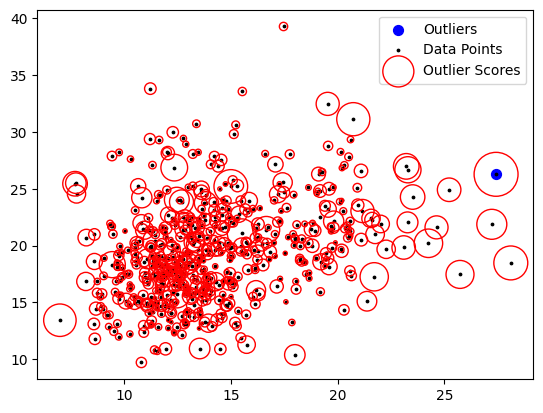

In [17]:
# threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min()) #normalizasyon
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend() #label'ların görünmesi için gereklidir.
plt.show()

radius, her bir veri noktasının outlier olup olmamasıyla doğru orantılıdır. Eğer radius büyük ise outlier olmaya yakındır, radius küçük ise outlier olmaya yakın değildir.

radius değişkeni içerisine 0 ile 1 arasında normalize edilen score değerleri yazılmıştır.

In [18]:
# drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

Outlier'lardan kurtulduğumuza göre veri setini train ve test setlerine bölelim.

In [19]:
#Train test split
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

Data'nın bölünümü random_satet parametresi ile sabitlenir.

### Standardization

Standardization işlemi verinin yeniden ölçeklendirilmesidir. Veri ölçeklendirildiğinde veri seti mean değeri 0 ve standart sapması 1 olan bir yapıya dönüşür.

Veri setindeki değerler arasında çok fazla scale farklılığı var ise standardization işlemi yapılır.

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train

print(X_train_df_describe)

        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  3.970000e+02  3.970000e+02    3.970000e+02  3.970000e+02   
mean   2.013503e-17 -2.953137e-16   -5.369341e-17 -2.237225e-16   
std    1.001262e+00  1.001262e+00    1.001262e+00  1.001262e+00   
min   -1.712388e+00 -2.175361e+00   -1.632924e+00 -1.303791e+00   
25%   -7.039450e-01 -7.291157e-01   -7.065592e-01 -6.765379e-01   
50%   -2.446426e-01 -1.109439e-01   -2.549616e-01 -2.989145e-01   
75%    4.919745e-01  5.648931e-01    5.336490e-01  3.852569e-01   
max    4.033514e+00  4.645288e+00    4.063861e+00  5.327298e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     3.970000e+02      3.970000e+02    3.970000e+02         3.970000e+02   
mean     -3.803283e-17     -2.192481e-16    4.474450e-17         7.159121e-17   
std       1.001262e+00      1.001262e+00    1.001262e+00         1.001262e+00   
min      -2.404872e+00     -1.638974e+00   -1.126020e+00        -1.29151

Normalizasyon işlemi ile daha düzenli bir dağılıma sahip veri noktaları elde edilmiştir. Şimdi box plot çizdirelim.

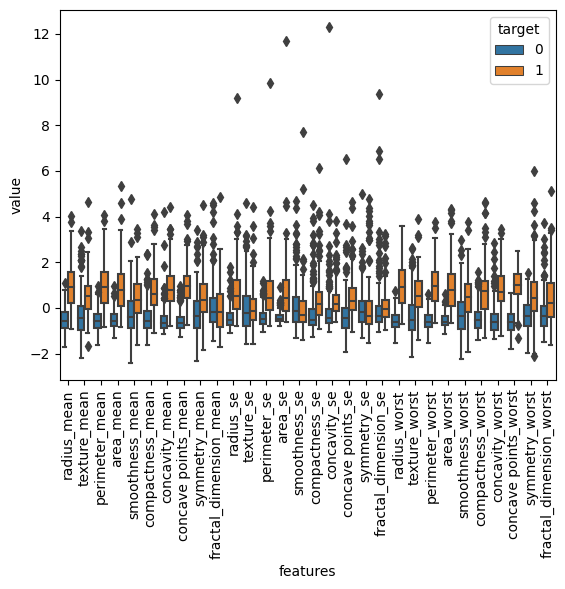

In [21]:
# box plot 
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

İleride model gerekli performansı sağlayamaz ise geriye dönüp yukarıdaki plot'ta gördüğünüz üst kısımdaki ayrık outlier'ları çıkarmamız gerekir.

Aralarında mesafe olan dikdörtgenler, birbirinden güzel ayrılan feature'lerdir. Bu feature'ler bizim için anlamlıdırlar. Dolayısıyla feature extraction kısmında kullanabileceğimiz feature'lerdir.

Normalizasyon işlemi ile mean değeri 0 ve satndart sapma değeri 1 olmuştur. Fakat normalizasyon işlemine rağmen Skewness olan veri normal dağılıma sahip olmamıştır. Çünkü Skewness bir şekildir ve mean, standart sapma değerleri ile Skewness arasında bir ilişki yoktur.

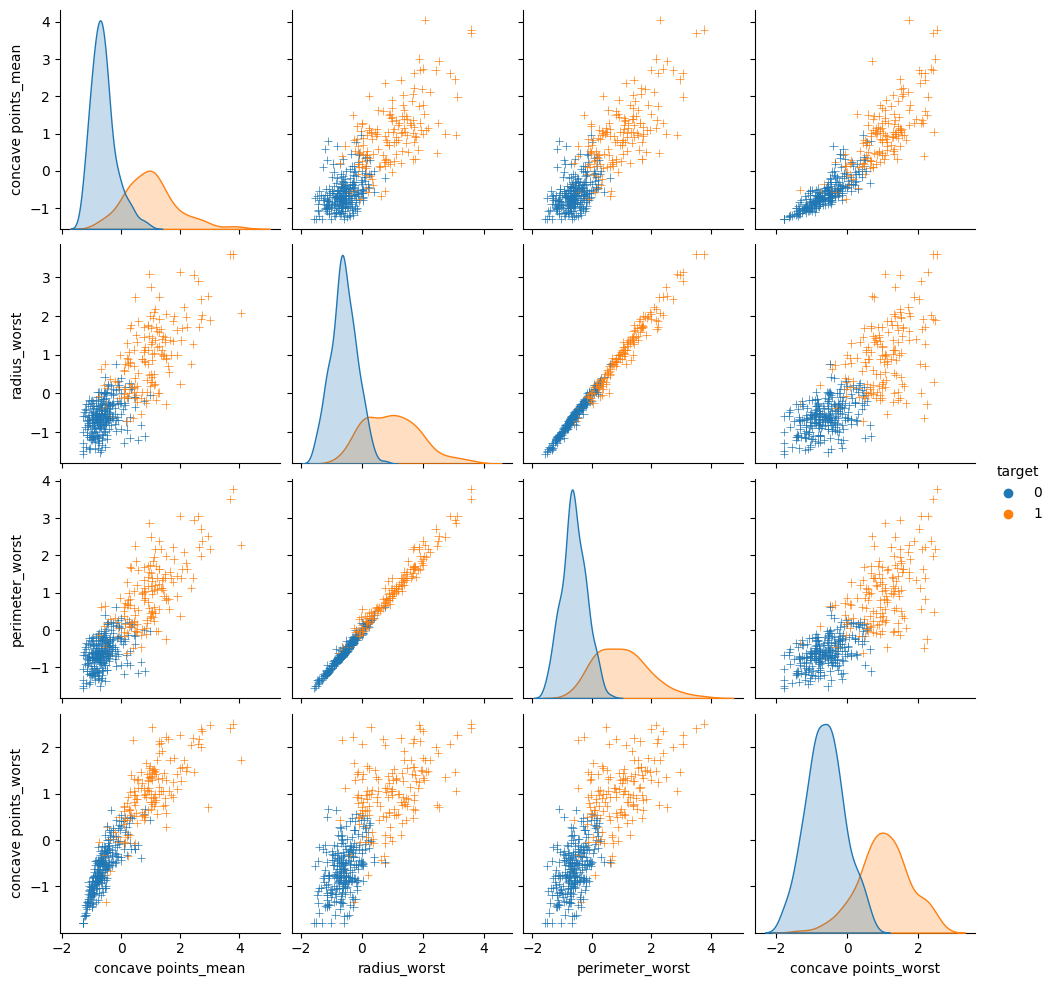

In [22]:
# pair plot 
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

In [23]:
# KNN Method

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9532163742690059
CM:  [[108   1]
 [  7  55]]
Basic KNN Acc:  0.9532163742690059


accuracy ile score metodları aynı şeylerdir ve aynı sonucu verirler.

108+55=163 tane tahmin doğrudur, 1+7=8 tane tahmin yanlıştır.

KNN algoritması outlier'lara karşı hassastır ve outlier olması durumunda KNN aloritması iyi çalışmayacaktır. Büyük veri (big data) olması durumunda KNN algoritması yavaşlar ve iyi sonuç üretemez. Çok fazla feature olması durumunda da KNN algoritması sıkıntı çıkaracaktır. Inbalance data olması durumunda KNN algoritması sıkıntı çıkaracaktır. KNN algoritması feature scaling işlemi yapılmasını ister, eğer feature scaling yapılmamış ise KNN algoritması düzgün çalışmayacaktır. Bu durumlardan herhangi birisine sahip olunmadığından KNN kullanılmasında bir sakınca yoktur.

<br>
<img src="g7.png" align = "left" style="width:600px;height:300px"/><br>

Yukarıda overfitting, underfitting ve dengeli bir duruma ait grafikleri görmektesiniz.

In [24]:
# choose best parameters

def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid
    
    
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


Model karmaşıklı az olduğunda başarım test setinde artar ve overfitting önlenir.


Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


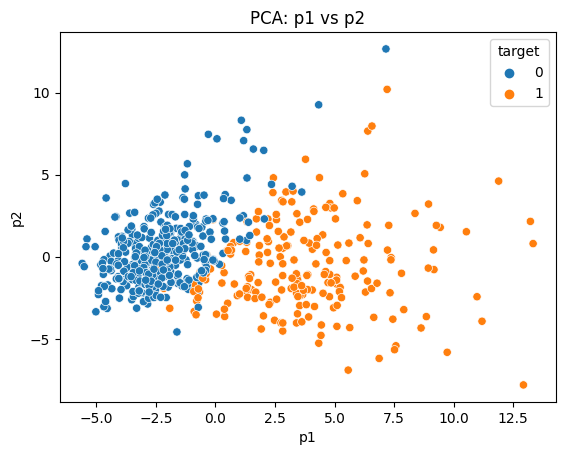

In [25]:
#PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


PCA, mümkün olduğu kadar bilgi tutarak verinin boyutunun azaltılmasını sağlayan yöntemdir. Eğer bir güç veya zaman kısıtı var ise ve verinin boyutu çok fazla ise PCA ile belli başlı feature'leri azaltabiliriz. Yani verinin boyutunu azaltabiliriz.

PCA kullanmamızın bir diğer sebebi ise, eğer elimizde bir korelasyon matrisi var ise ve bazı feature'ler birbirleri ile ilişkili ise bu feature'leri nasıl çıkaracağımızı bilmiyor isek bu feature'leri ortadan kaldırma işlemi için PCA yöntemini kullanabiliriz. 

Bizim veri setimizin boyutu çok fazla değil. PCA yönteminin kullanılma sebeplerinden birisi de görselleştirmedir. KNN algoritmasının nasıl gerçekleştiğini görselleştirebilmek amacıyla PCA yöntemi kullanacağız. Eğer elimizde 30 boyutlu bir veri var ise bunu görselleştiremeyiz. Renk ve size'ıda kullanırsak maksimum 5 boyuta kadar çıkabiliriz. Sub plotlarıda kullanırsak 6,7 boyuta kadar çıkabiliriz. Ama daha fazla boyutu görselleştiremeyiz. Bu nedenle PCA yöntemini kullanacağız.

Principle component'leri alıp 2 boyuta düşüreceğiz. 30 boyutlu veriden 2 boyuta düşüreceğiz. KNN algoritmasını bu 2 boyut üzerinde eğiterek KNN algoritmasının verdiği kararları nasıl görselleştireceğimizi öğreneceğiz.

PCA metodunun amacı, eigen vector ve eigen value'leri bulmaktır.

Eigen vector, yeni feature alanının yönüdür.

x ve y eksenlerinde iki boyutlu bir veri düşünün. Bu veriye PCA uygulayarak farklı bir Feature space'ye taşıyalım. Taşıdığımız yer 2 boyutlu veya 1 boyutlu olabilir. Farklı bir feature space'ye taşırken eigen vector ve eigen value'leri kullanacağız. Öncelikle verinin ortalamasını buluruz. x eksenindeki ortalaması ve y eksenindeki ortalaması bulunur. Daha sonrasında bu ortamaları x ekseninden ve y ekseninden çıkarıp kendilerine eşitleriz. Böylelikle ortalamalarını çıkardığımız için veriyi sıfır merkezli bir hale getirmiş olduk. Artık verinin merkezi (0,0) noktasıdır.
Şimdi kovaryansını bulmak istiyoruz. cov(x,y) şeklinde 2 tane vektörün kovaryansını bulalım. 

Kovaryans, iki değişkenin birlikte ne kadar değiştiğinin ölçüsüdür.

Kovaryansları bulduktan sonra 2x2'lik bir matris elde edilir.

In [26]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()]) 
#ravel metodu ile matrisi düzleştirme gerçekleştirilmiştir. Matris, vektöre dönüşmüştür.

Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

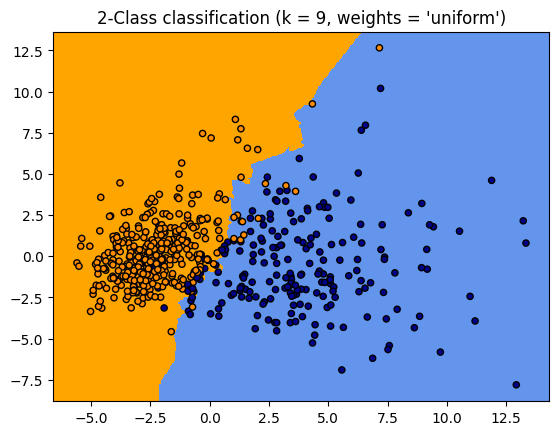

In [27]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

Çıktıda gördüğünüz sarı kısım bir class'ıt ve mavi kısım bir class'tır.


Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


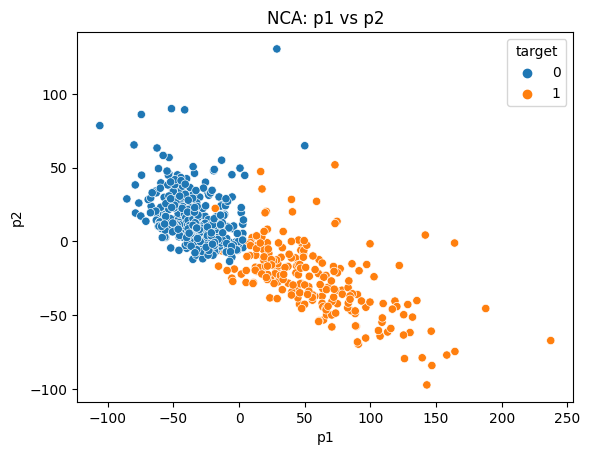

In [28]:
# NCA

nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

NCA'in amacı, leave one out classification performansını maksimize edecek şekilde input verilerinin doğrusal dönüşümünü kullanarak mesafe metriğini öğrenmektir. Rastgele bir distance metriğinin belirlenmesi yerine doğrusal dönüşümü bularak bu metriği NCA algoritması kendisi öğrenmektedir. leave one out classification algoritması, belirli bir mesafe ölçüsü kullanarak k en yakın komşunun birlikte başka tek bir noktayı predict etmeye çalıştığı yöntemdir.

NCA, PCA'in aksine unsupervised learning değildir. NCA fit işlemini gerçekleştirirken y'ye yani target variable'ye ihtiyaç duyar.

Yukarıdaki kod çıktısında görüldüğü üzere PCA'e göre daha iyi bir ayrım NCA ile elde edilmiştir.

Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

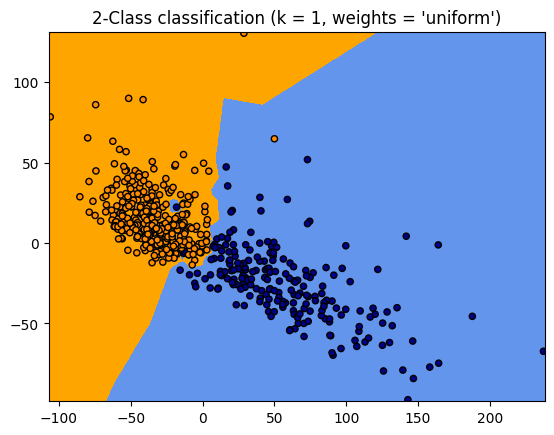

In [29]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))


Çıktıda görülen turuncu kısımdaki mavi nokta, k için en iyi değerin 1 olarak seçilmesinden kaynaklıdır.

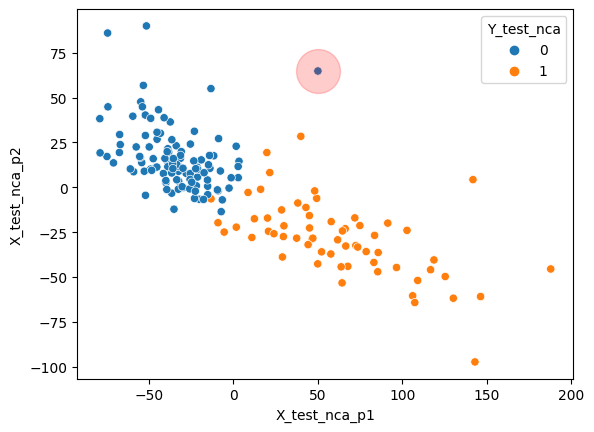

In [30]:
#find wrong decision
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)

<br>
<img src="g8.png" align = "left" style="width:600px;height:300px"/><br>

Çalışma süresince gerçekleştirilen işlemler ve alınan sonuçlar yandaki görselde gördüğünüz şekildedir.